## Pytorch

In [7]:
import torch

#Si tenemos GPU
if torch.cuda.is_available() == True:
    #activamos el GPU
    device = torch.device('cuda')
else:
    #Sino usamos la CPU
    device = torch.device('cpu')

##### ¿Qué son los tensores?

Son como los arrays en Pytorch con la diferencia importante de que con Pytorch podemos hacer el procesamiento en un GPU. Es decir, todos los vectores pueden ser procesados paralelamente para ciertas operaciones.

In [8]:
#Crear un tensor con 5 número aleatorios. Nota que los números no son exactamente cero
x = torch.empty(5)
print(x)

tensor([3.3234e-09, 2.5642e-09, 2.1354e+20, 3.2686e+21, 1.7661e-04])


In [3]:
#Crear un tensor que contenga dos números fijos como elemntos
x = torch.tensor([1,2])
print(x)
#Crear un tensor de dimensiones (1,2) lleno de ceros e instanciarlos
x = torch.zeros((1,2))
print(x)
#Crear un tensor lleno de unos
x = torch.ones([1,2])
print(x)

tensor([1, 2])
tensor([[0., 0.]])
tensor([[1., 1.]])


In [4]:
 #Crear tensores que estén dentro de un rango específico
 x = torch.arange(start=1, end=8)
 print(x)
 #Recuerdas para qué sirve el linspace de NumPy? Acá también puedes hacer algo parecido:
 x = torch.linspace(start=3, end=10, steps=5)
 print(x)
 #Podemos también generar un tensor con números randoms.
 x = torch.rand(5)
 print(x)
 #Halla un valor minimo y un valor máximo del tensor random q generaste, luego imprimelo.
 minimun_val = x.min()
 maximun_val = x.max()
 print(minimun_val, '-', maximun_val)

tensor([1, 2, 3, 4, 5, 6, 7])
tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])
tensor([0.2733, 0.7949, 0.5308, 0.6289, 0.3981])
tensor(0.2733) - tensor(0.7949)


In [5]:
#Definamos un tensor:

tensor_inicial = torch.tensor(
[
    [
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 0,  1,  2,  3]
    ]
    ,
    [
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [ 0,  1,  2,  3]
    ]
    ,
    [
        [17, 18, 19, 20],
        [21, 22, 23, 24],
        [ 0,  1,  2,  3]
    ]
])
print(tensor_inicial.shape)

#Linearizamos un tensor (Flatten)
flatten_tensor = tensor_inicial.flatten()
print(flatten_tensor)

torch.Size([3, 3, 4])
tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,  3,  9, 10, 11, 12, 13, 14,
        15, 16,  0,  1,  2,  3, 17, 18, 19, 20, 21, 22, 23, 24,  0,  1,  2,  3])


In [6]:
#Convertir un tensor de pytorch a una lista.
listed_tensor = flatten_tensor.tolist()
print(listed_tensor)
listed_inicial = tensor_inicial.tolist()
print(listed_inicial)

#Nota que cuando conviertes un tensor a lista, conserva sus dimensiones...

[1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 9, 10, 11, 12, 13, 14, 15, 16, 0, 1, 2, 3, 17, 18, 19, 20, 21, 22, 23, 24, 0, 1, 2, 3]
[[[1, 2, 3, 4], [5, 6, 7, 8], [0, 1, 2, 3]], [[9, 10, 11, 12], [13, 14, 15, 16], [0, 1, 2, 3]], [[17, 18, 19, 20], [21, 22, 23, 24], [0, 1, 2, 3]]]


#### Conceptos de Álgebra Lineal

In [7]:
#Producto punto:
A = torch.rand((5))
B = torch.rand((5))
dot_prod = A.dot(B)

print('A: {}\nB: {}'.format(A,B))
print('Dot_prod = {}'.format(dot_prod))

A: tensor([0.2422, 0.0792, 0.5317, 0.8457, 0.0506])
B: tensor([0.2444, 0.0731, 0.7967, 0.5902, 0.3859])
Dot_prod = 1.007243275642395


In [8]:
#Matrices transpuestas:
A_t = torch.transpose(A,0,-1)
B_t = torch.transpose(B,0,-1) #Qué son los números de dim???¿?¿?¿?

print(A_t)
print(B_t)

#Probando las propiedades.
#Primera propiedad
statement = ((A_t + B_t) == torch.transpose((A+B), 0, -1))
print(statement)

#Segunda propiedad
statement = (torch.transpose(A.matmul(B), 0, -1) == B_t.matmul(A_t))
print(statement)

tensor([0.2422, 0.0792, 0.5317, 0.8457, 0.0506])
tensor([0.2444, 0.0731, 0.7967, 0.5902, 0.3859])
tensor([True, True, True, True, True])
tensor(True)


In [9]:
#Multiplicación de matrices: Con matmul.
A = torch.rand((5,3))
B = torch.rand((3,5))
print(A)
print(B)
print(A.matmul(B))

tensor([[0.0598, 0.0336, 0.3828],
        [0.6235, 0.2057, 0.5529],
        [0.1874, 0.3649, 0.0189],
        [0.2874, 0.9396, 0.9503],
        [0.5933, 0.2090, 0.6205]])
tensor([[0.4780, 0.2188, 0.7512, 0.6178, 0.3653],
        [0.1003, 0.4335, 0.2254, 0.1176, 0.2519],
        [0.8364, 0.3298, 0.5603, 0.1808, 0.6449]])
tensor([[0.3521, 0.1539, 0.2670, 0.1101, 0.2772],
        [0.7812, 0.4080, 0.8246, 0.5094, 0.6362],
        [0.1420, 0.2055, 0.2336, 0.1621, 0.1726],
        [1.0264, 0.7836, 0.9601, 0.4598, 0.9545],
        [0.8235, 0.4250, 0.8404, 0.5033, 0.6695]])


#### DETERMINANTES:

In [10]:
#Determinante
tensor = torch.rand((2,2))
print(tensor)
print("Det: {}".format(tensor.det()))
#traza
print("Traza: {}".format(torch.trace(tensor)))

tensor([[0.6205, 0.5321],
        [0.9398, 0.5245]])
Det: -0.17465323209762573
Traza: 1.1450276374816895


### Autovectores

In [11]:
print("Eigen vectors: " ,tensor.eig(eigenvectors=True))

Eigen vectors:  torch.return_types.eig(
eigenvalues=tensor([[ 1.2813,  0.0000],
        [-0.1363,  0.0000]]),
eigenvectors=tensor([[ 0.6272, -0.5752],
        [ 0.7788,  0.8180]]))


## Descenso de la Gradiente con Pytorch: 

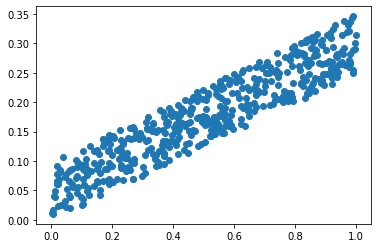

In [39]:
#Generamos arrays que sean lineales de manera proporcional, pero a su vez random.
import matplotlib.pyplot as plt

#t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
#t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

X = torch.tensor(t_c)
Y = torch.tensor(t_u)

X = torch.rand(500)
Y = X*0.25 + torch.randint(low=0, high=100, size=(500,))/1000


plt.scatter(X, Y)

In [40]:
#Asumirmeos que a partir de ahora solo tenemos los datos, así que describiremos la forma de nuestro modelo.
#En una función, para poder luego minimizar los errores.

def model(X, w, b):
  """
  Tenemos un modelo lineal simple.
  """
  return X*w + b

#Definimos la funcion de pérdida como el clásico error medio al cuadrado (MSE)

def funcion_perdida(preds,Y):
  """
  Donde Y son los valores reales y preds las predicciones.
  """
  squared_diffs = (preds - Y)**2
  return squared_diffs.mean()

#Ahora, debemos inicializar el modelo. Recuerda que vamos a inferir los pesos (w)

w = torch.ones(())
b = torch.zeros(())

preds = model(X, w, b)
#Ahora chequeamos el valor del error.
loss = funcion_perdida(preds, Y)
print("El Loss es: ",loss)

El Loss es:  tensor(0.1587)


In [41]:
#Necesitamos la derivada de nuestra funcion de perdida:
def deriv_loss(preds,Y):
  dsq_diffs = 2 * (preds - Y) / preds.size(0)
  return dsq_diffs

def deriv_w_model(X, w, b):
  
  return X

def deriv_b_model(X, w, b):
  #Porque es de grado 1.
  return 1.0

def funcion_gradiente(X,Y,preds, w, b):
  """
  La funcion que va a retornoar la gradiente de l loss con respecto a w y b.
  Recuerda que la gradiente no es más que las derivadas de la F(Coste) con respecto
  a w y b respectivamente.

  Recuerda también que sumamos todas las derivadas al final. 
  """
  dloss_dtp = deriv_loss(preds, Y)
  dloss_dw = dloss_dtp * deriv_w_model(X,w,b)
  dloss_db = dloss_dtp * deriv_b_model(X,w,b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [42]:
def training_loop(n_epochs, learning_rate, params, X, Y):
  """
  Función para poder entrenar los parámetros junto con el descenso de la gradiente
  """
  for epoch in range(1, n_epochs + 1):
    w, b = params
    preds= model(X,w,b)     #M(forward pass) Predigo
    loss = funcion_perdida(preds,Y) #calculo el loss

    grad = funcion_gradiente(X, Y, preds, w, b)  #Barward pass (Calculo las gradientes de los errores)

    params = params - learning_rate * grad #Según formula, actualizo parámetros según gradiente.
    print('Epoca %d, Loss %f' % (epoch, float(loss)))

  return params

In [43]:
#Recuerda que tenemos instanciados nuestros parámetros X e Y.

training_loop(n_epochs = 100, 
              learning_rate = 1e-2,
              params = torch.tensor([1.0,0.0]),
              X = X,
              Y = Y)

Epoca 1, Loss 0.158682
Epoca 2, Loss 0.152162
Epoca 3, Loss 0.145967
Epoca 4, Loss 0.140081
Epoca 5, Loss 0.134490
Epoca 6, Loss 0.129177
Epoca 7, Loss 0.124128
Epoca 8, Loss 0.119331
Epoca 9, Loss 0.114773
Epoca 10, Loss 0.110442
Epoca 11, Loss 0.106325
Epoca 12, Loss 0.102413
Epoca 13, Loss 0.098695
Epoca 14, Loss 0.095161
Epoca 15, Loss 0.091802
Epoca 16, Loss 0.088609
Epoca 17, Loss 0.085574
Epoca 18, Loss 0.082689
Epoca 19, Loss 0.079946
Epoca 20, Loss 0.077337
Epoca 21, Loss 0.074857
Epoca 22, Loss 0.072499
Epoca 23, Loss 0.070256
Epoca 24, Loss 0.068123
Epoca 25, Loss 0.066095
Epoca 26, Loss 0.064165
Epoca 27, Loss 0.062329
Epoca 28, Loss 0.060582
Epoca 29, Loss 0.058921
Epoca 30, Loss 0.057339
Epoca 31, Loss 0.055834
Epoca 32, Loss 0.054402
Epoca 33, Loss 0.053038
Epoca 34, Loss 0.051740
Epoca 35, Loss 0.050504
Epoca 36, Loss 0.049327
Epoca 37, Loss 0.048206
Epoca 38, Loss 0.047138
Epoca 39, Loss 0.046121
Epoca 40, Loss 0.045151
Epoca 41, Loss 0.044228
Epoca 42, Loss 0.043347
E

tensor([ 0.7868, -0.2162])

### Manejando dimensiones-

Tenemos que vamos a usar bastante estos tipos de tensores (con estas dimensiones).
Donde n_channels representa las capas que tiene una imagen que en su mayoría son 3 para los 3 canales de coloeres q existen (RGB).

```
torch.rand(batch_size, n_channels, n_x, n_y)
```

In [11]:
tensor = torch.rand(10,3,128,128)

In [16]:
#Esto es para poder redondear en un rango (X,Y): tensor.clip(X,Y)
clipped_tensor = tensor.clip(0.2,0.8)
clipped_tensor